In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
#合并各月流水数据

def hebing(region):
    data1 = pd.read_csv("D:/pytest/liushui/1liushui.csv", encoding="gbk")
    data1_lt = data1[data1['企业名称系统存储'] == region]
    for i in range(2,11):
        data2 = pd.read_csv("D:/pytest/liushui/%dliushui.csv"%i, encoding="gbk")
        data2_lt = data2[data2['企业名称系统存储'] == region]
        data = pd.concat([data1_lt, data2_lt])
        data1_lt = data 
    return data1_lt;

#绘制每天的流水折线图
def line_day(region):
    data1_lt = hebing(region)
    data1_lt['date'] = pd.to_datetime(data1_lt['订单时间'],infer_datetime_format=True)  
    data_lt1 = pd.pivot_table(data1_lt, index=['date'], values=['金额'], aggfunc = np.sum)
    data_lt1 = data_lt1.reset_index()
    data_lt12 = data_lt1.copy()
    data_lt12['date'] = [datetime.strftime(x, '%Y/%m/%d') for x in data_lt12['date']]
    data_lt11 =data_lt12.loc[:,['金额', 'date']]
    data_lt11 = data_lt11.set_index('date')
    data_lt11 = data_lt11.sort_index()
    data_lt11 = data_lt11.reset_index()
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(data_lt11['date'], data_lt1['金额'])
    plt.xticks(data_lt11.date[[0,25,50,75,100,125,150,175,200,225,250,275]], rotation='45', ha='right')
    plt.show()
    return data_lt1;

    
#绘制每月的流水折线图
def line_month(region):
    data_lt1 = line_day(region)
    #计算每月的数据
    a = []
    m = []
    y = []
    for item in data_lt1.index:
        if data_lt1.iloc[item].date.year == 2017:
            for month in range(1,13):
                if data_lt1.iloc[item].date.month == month:
                    m.append(month)
                    a.append(data_lt1.iloc[item].金额)
                    y.append(2017)
        if data_lt1.iloc[item].date.year == 2018:
            for month in range(1,13):
                if data_lt1.iloc[item].date.month == month:
                    m.append(month)
                    a.append(data_lt1.iloc[item].金额)
                    y.append(2018)
    o = pd.DataFrame(list(zip(a,m,y)))
    o.rename(columns={0:'金额', 1:'月份', 2:'年份'}, inplace=True)
    o['date'] =1
    for i in range(0,len(o)):
        o['date'][i] = '%s'%o['年份'][i] + '/' + '%s'%o['月份'][i]
    c = pd.pivot_table(o, index=['date'], values=['金额'], aggfunc = np.sum)
    c = c.reset_index()
    c['date'] = [datetime.strptime(x, '%Y/%m') for x in c['date']] # str转date
    c.sort_values("date")
    d = c.copy()
    d = d.set_index('date')
    d = d.sort_index()
    d = d.reset_index()
    d['date'] = [datetime.strftime(x, '%Y/%m/%d') for x in d['date']] # date转str
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)
    ax1.plot(d['date'], d['金额'])
    plt.xticks(d.date, rotation='45', ha='right')
    plt.show()

    
#画图函数

def picture(region):
    hebing(region)
    line_day(region)
    line_month(region)


c:\users\zhangchi23\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


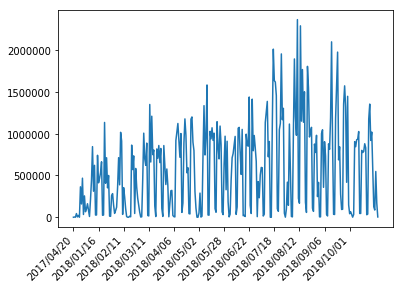

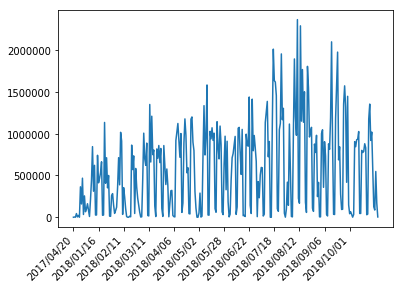

c:\users\zhangchi23\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


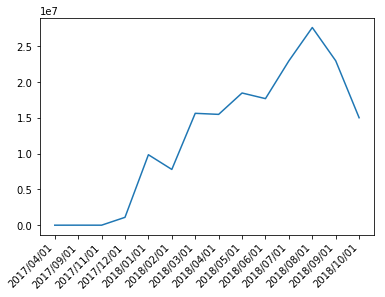

In [4]:
#运行画图程序
region = '中国联合网络通信集团有限公司'
picture(region)